<a href="https://colab.research.google.com/github/SaniyaBubere/ML_Regression_Retails_Sales_Prediction/blob/main/ML_Regression_Retails_sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [226]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORT MODULES

In [227]:
#importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

LOADING THE DATASETS

In [228]:
#loading Rossmann Data as df1
df1=pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv')

In [229]:
#loading Store Data as df2
df2=pd.read_csv('/content/drive/MyDrive/store.csv')

In [230]:
#1st 5 rows of df1
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [231]:
#1st 5 rows of df2
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [232]:
#Statistical Info
df1.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


 There is No Null Values in Rossmann Dataset


In [233]:
#Statistical Info
df2.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


There is Missing Values in Columns(Competition Distance ,Competition open since month,Competition open since year  ,Promo2 since week and Promo2 since year in Store Dataset

In [234]:
#datatype of attributes of Rossman Dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [235]:
#datatype of attributes of Store Dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [236]:
#check unique value in Rossman dataset
count=df1[['Store','DayOfWeek','Date','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']].nunique()
print("Unique value count:\n",count)

Unique value count:
 Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


In [237]:
#check unique value in Store dataset
count2=df2[['Store','StoreType','Assortment','CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']].nunique()
print("Unique Values Count Fro Datase 2:\n",count2)

Unique Values Count Fro Datase 2:
 Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


Preprocessing the datasets

In [238]:
#Checking Null Values in Rossman Dataset
df1.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

* There is No Null Value in Rossman Dataset

In [239]:
#checking null value in Store Dataset
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

* There are Six Columns with Null Values/Missing Values are as follow:
* CompetitionDistance- distance in meters to the nearest competitor store

* CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened   
* CompetitionOpenSinceYear-  gives the approximate year of the time the nearest competitor was opened   
* Promo2SinceWeek, Promo2SinceYear and PromoInterval  

In [240]:
# Checking if any Duplicate values are present in the Rossman Dataset
df1.duplicated().sum()

0

There is No Duplicates in Rossman Dataset

In [241]:
# Checking if any Duplicate values are present in the Store Dataset
df2.duplicated().sum()

0

There is No Duplicates in Store Dataset

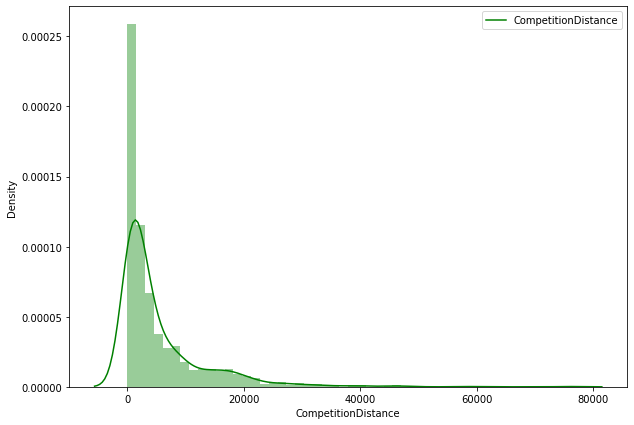

In [242]:
plt.figure(figsize=(10,7))
sns.distplot(df2['CompetitionDistance'],color = 'green')
plt.legend(['CompetitionDistance'])
plt.show()

From the above Plot we can see that the CompetitionDistance is Positively Skewed

In [243]:
#checking mean 
Checking_Mean=df2['CompetitionDistance'].mean()
Checking_Mean

5404.901079136691

In [244]:
#checking median
Checking_Median=df2['CompetitionDistance'].median()
Checking_Median

2325.0

In [245]:
#checking mode
Checking_Mode=df2['CompetitionDistance'].mode()
Checking_Mode

0    250.0
dtype: float64

In [246]:
#Filling Nan Values With Median 
df2['CompetitionDistance'].fillna(Checking_Median,inplace=True)
#Checking that Nan Value is Replaced or Not
df2['CompetitionDistance'].isnull().value_counts()

False    1115
Name: CompetitionDistance, dtype: int64

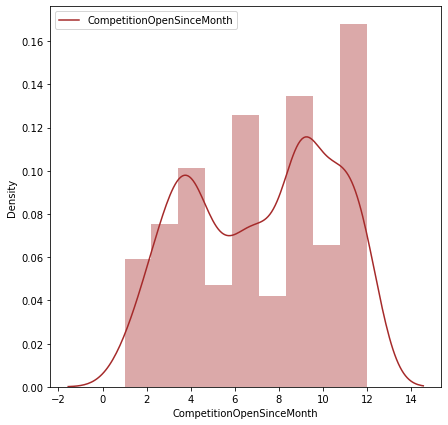

In [247]:
plt.figure(figsize=(7,7))
sns.distplot(df2['CompetitionOpenSinceMonth'],color = 'brown')
plt.legend(['CompetitionOpenSinceMonth'])
plt.show()

From the Above Plot We Can Say That The CompetitionOpenSinceMonth is Left Skewed





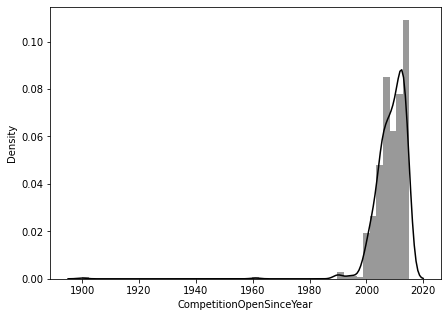

In [248]:
plt.figure(figsize=(7,5))
sns.distplot(df2['CompetitionOpenSinceYear'],color='black')
plt.show()

From the Above Plot We Can Say That The CompetitionOpenSinceYear is Left Skewed


In [249]:
#Checking Means
mean_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].mean()
mean_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       7.224704
CompetitionOpenSinceYear     2008.668857
dtype: float64

In [250]:
#Checking Median
median_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].median()
median_CompetitionOpenSinceMonth_Year

CompetitionOpenSinceMonth       8.0
CompetitionOpenSinceYear     2010.0
dtype: float64

In [251]:
#Checking Mode
Mode_CompetitionOpenSinceMonth_Year=df2[['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']].mode()
Mode_CompetitionOpenSinceMonth_Year

,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
0,9.0,2013.0


In [252]:
#Replacing the Null values with suitable value
df2['CompetitionOpenSinceMonth'].fillna(df2['CompetitionOpenSinceMonth'].mode()[0],inplace=True)

In [253]:
#Replacing the Null Values with suitable value
df2['CompetitionOpenSinceYear'].fillna(df2['CompetitionOpenSinceYear'].mode()[0],inplace=True)

In [254]:
## Replacing the Null values with suitable value
df2[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']]=df2[['Promo2SinceWeek','Promo2SinceYear','PromoInterval']].replace(np.nan,0)

Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [255]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Hurreyy Now We Don't have any Null Value in Our Dataset

Merging Both DataSets

In [256]:
#merging both dataset
df=df1.merge(df2)

In [257]:
#checking merge df
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [258]:
#checking null values in merged df
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [259]:
#Checking Unique Value of all Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [265]:
#checking unqiue value in StateHoliday column
df.StateHoliday.unique()

array([0, 'a', 'b', 'c'], dtype=object)

0 is in String formate so we have to replace it with int dtype

In [261]:
#CHECKING
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [262]:
#replacing
df['StateHoliday']=df['StateHoliday'].replace(['0'],0)

**Exploratory Data Analysis**

In [274]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


We Can See the Open Vs Close 
Open Have Higher Values

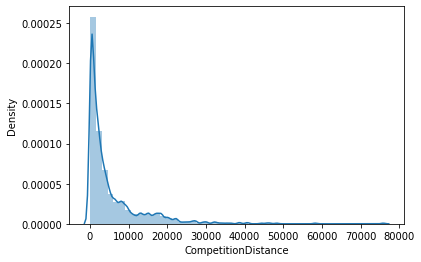

In [278]:
sns.distplot(df['CompetitionDistance'])

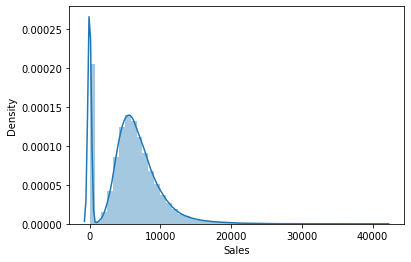

In [283]:
sns.distplot(df['Sales'])

In [ ]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

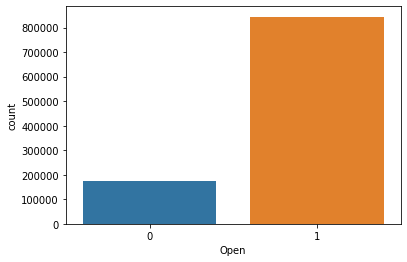

In [285]:
#for categorical attributes will use countplot
sns.countplot(df['Open'])

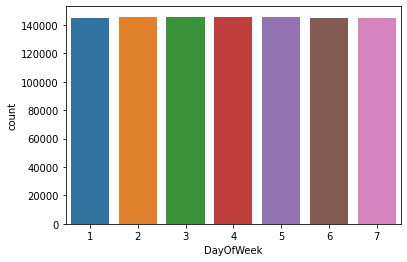

In [301]:
sns.countplot(df['DayOfWeek'])

In [ ]:
x,y = 'DayOfWeek', 'Sales'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

Open Vs Close Most of the Stores are Open

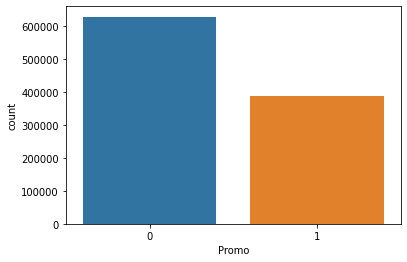

In [286]:
sns.countplot(df['Promo'])


Promo - indicates whethere a store is running a promo on that day 0 is for No 1 is for Yes
As per observation Store is not Running much on a day because 0 have higher value as compare to 1

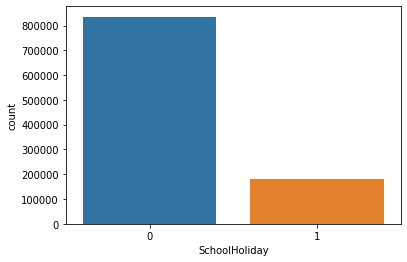

In [289]:
sns.countplot(df['SchoolHoliday'])

From this Observation we can say that most of the Store are Closed on School Holiday

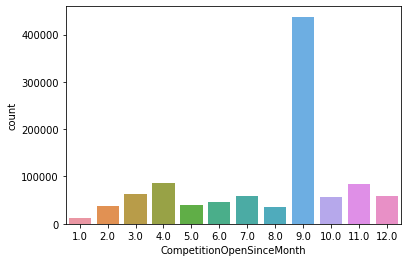

In [295]:
df.sort_values('CompetitionOpenSinceMonth')
sns.countplot(df['CompetitionOpenSinceMonth'])

Highest Conpetition Open Since September

In [ ]:

# l=list(df['CompetitionOpenSinceYear'].unique())
# Chart=sns.countplot(df['CompetitionOpenSinceYear'])
# Chart.set_xticklabels(labels=l,rotation=90,order=df.sort_values(count).CompetitionOpenSinceYear)



In [263]:
# df['Date']=pd.to_datetime(df['Date'])
# df['Date']

In [268]:
# #Year
# df['Year']=df['Date'].dt.year

In [267]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [270]:
# #Month
# df['month']=df['Date'].dt.month

In [271]:
# #Day
# df['Date'].dt.day


In [272]:
# df['Date'].dt.week

In [173]:
#df2.CompetitionOpenSinceMonth.quantile(1)

In [221]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [184]:
df1.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6])

In [190]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [273]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
# num_col=[]
# for x in df2.dtypes.index:
#   if df2.dtypes[x] == 'float64':
#     num_col.append(x)
# num_col

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear']

In [ ]:
# df2[['CompetitionDistance',
#  'CompetitionOpenSinceMonth',
#  'CompetitionOpenSinceYear',
#  'Promo2SinceWeek',
#  'Promo2SinceYear']].astype(int)

In [ ]:
# for col in num_col:
#   print(col)
#   print(df2[col].value_counts())
#   print()